In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.iloc[:20].style.background_gradient(cmap='viridis')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_72730/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


/var/folders/j2/flwblbrj09q2b8xyr_kcjqzr0000gn/T/ipykernel_72730/520262221.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='Purples')


<Axes: >

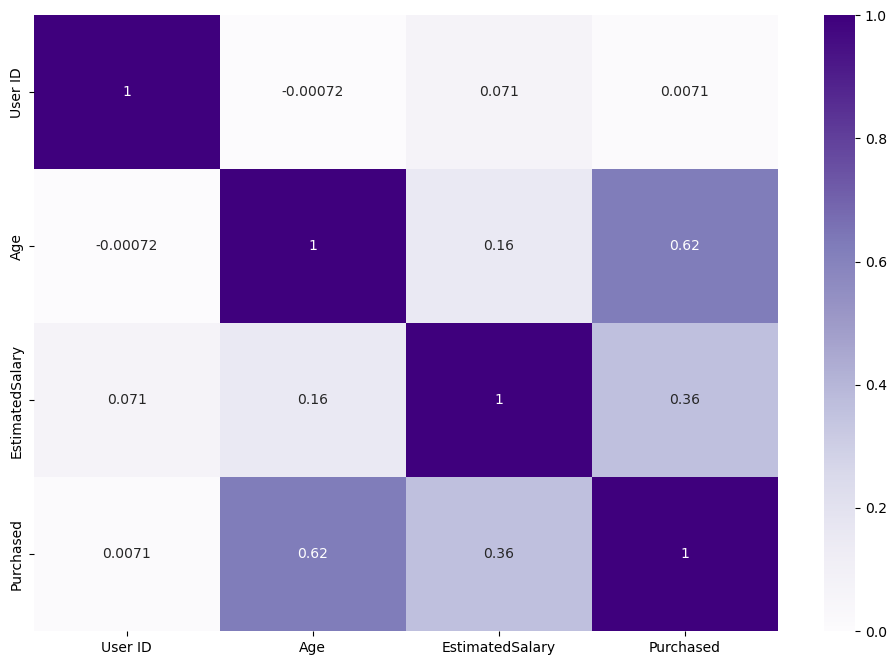

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='Purples')

<Axes: xlabel='Purchased', ylabel='count'>

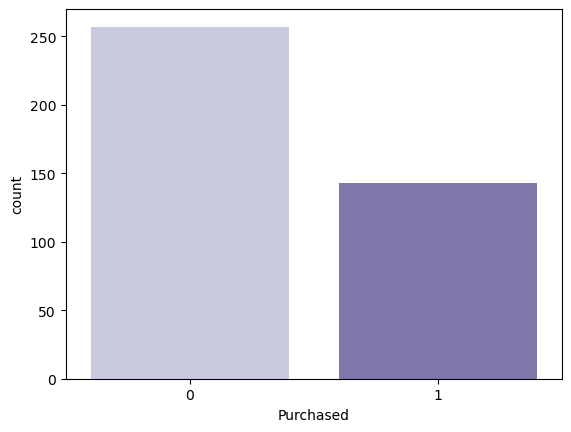

In [12]:
sns.countplot(x='Purchased', data=df, palette='Purples')

In [13]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
map_gender = {
    'Male' : 1,
    'Female' : 0
}

In [16]:
df['Gender'] = df['Gender'].map(map_gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [17]:
df[['Gender','Purchased']].value_counts()

Gender  Purchased
1       0            130
0       0            127
        1             77
1       1             66
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

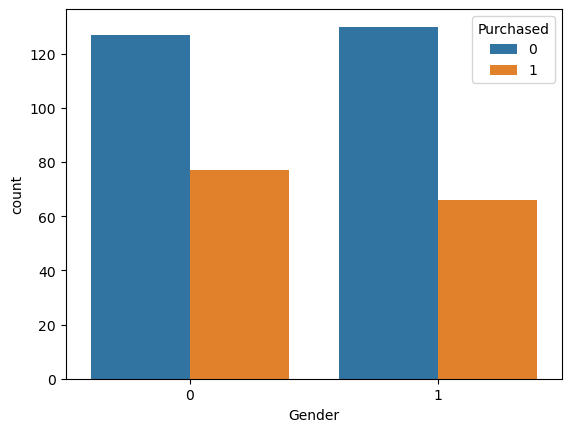

In [18]:
sns.countplot(x='Gender',data=df, hue='Purchased')

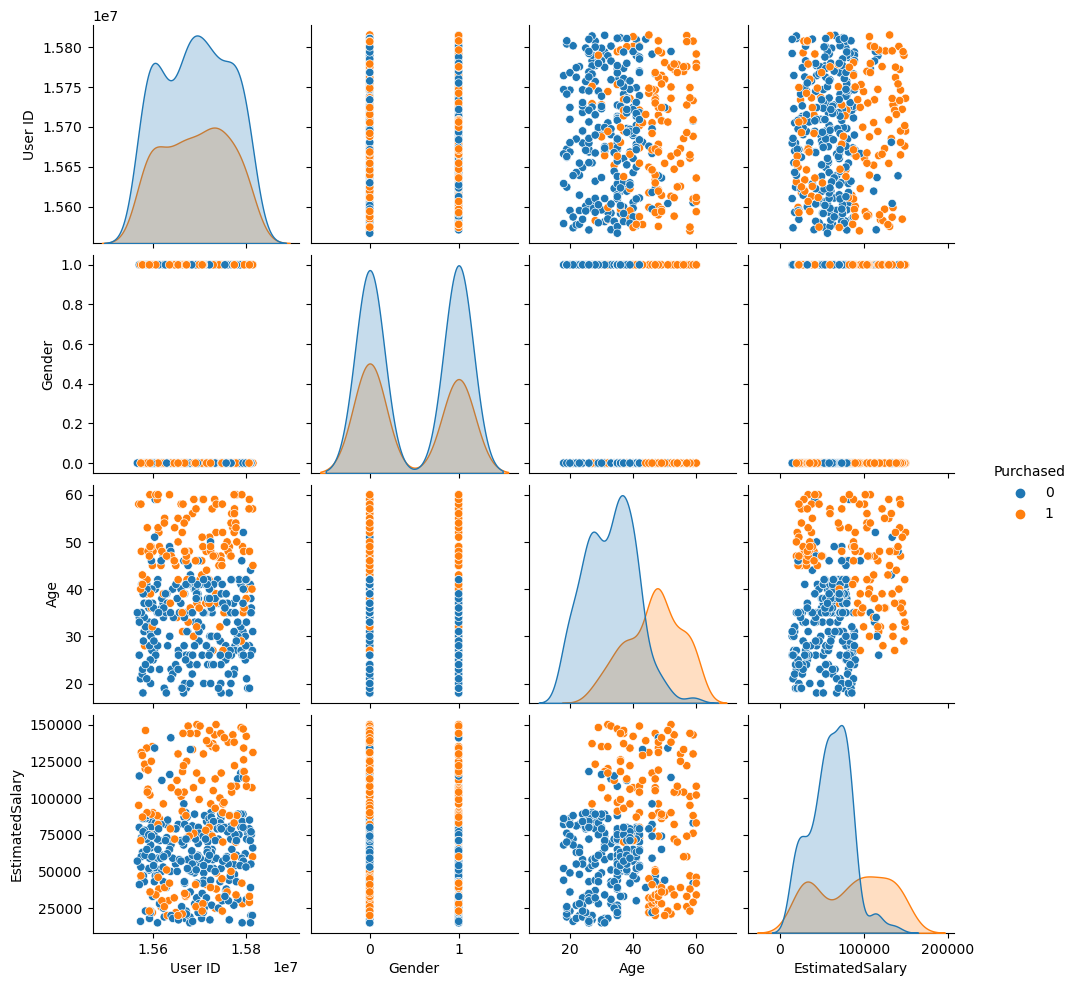

In [20]:
sns.pairplot(df, hue='Purchased');

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

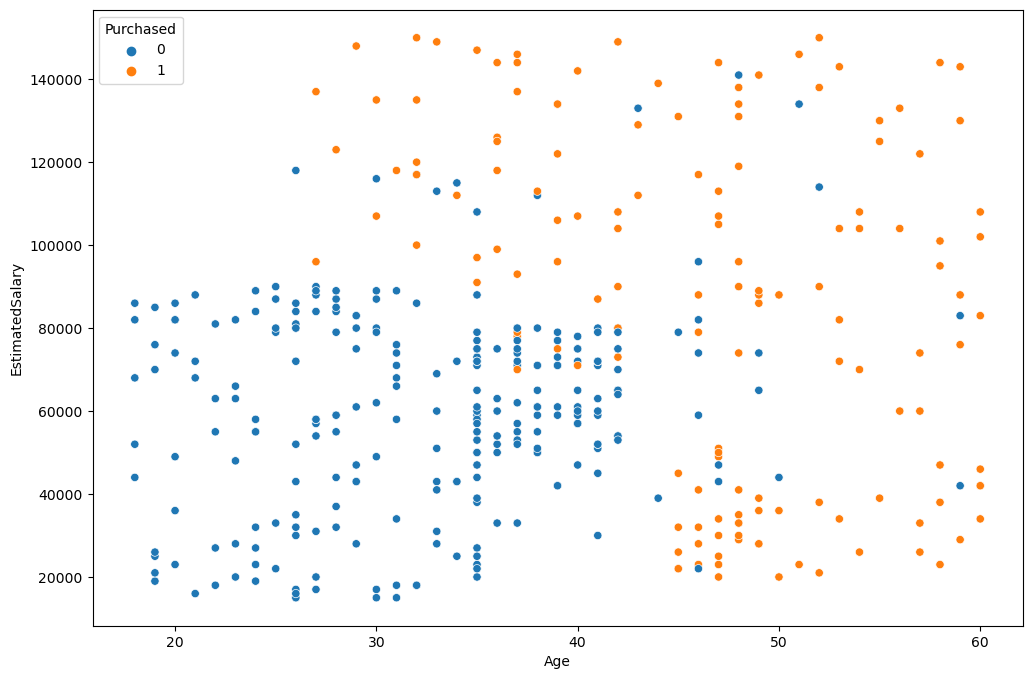

In [23]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

## Train Test Split

In [24]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=9)

## Model

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

In [33]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
pred = knn.predict(scaled_X_test)

## Model Değerlendirme

In [35]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

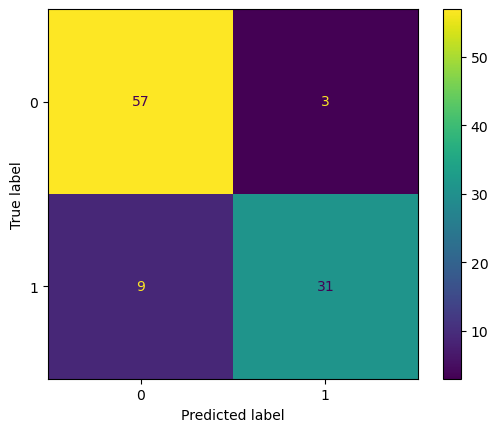

In [38]:
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test);

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.78      0.84        40

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



In [40]:
hata_oran = []


In [41]:
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train ,y_train)
    pred_elbow = knn.predict(scaled_X_test)
    
    err = 1 - accuracy_score(y_test, pred_elbow)
    hata_oran.append(err)

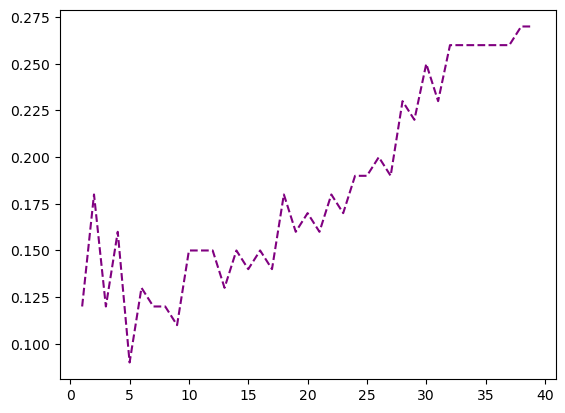

In [43]:
plt.plot(range(1,40), hata_oran, color='purple', linestyle='dashed')

In [44]:
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(scaled_X_train ,y_train)
    pred_elbow = knn.predict(scaled_X_test)

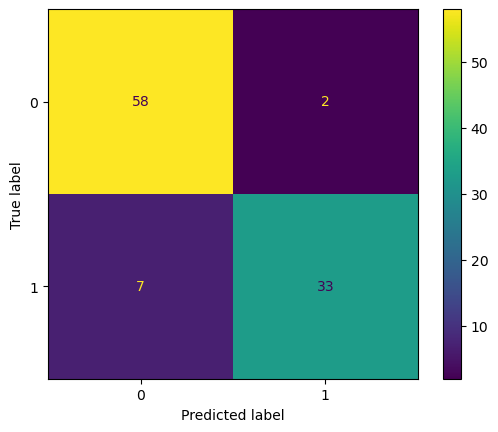

In [46]:
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.78      0.84        40

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100

